# import all depedencies

In [22]:
#!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
%matplotlib notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier###gh
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

# Load files from folders 

In [2]:
# # import each and every file

# dirB="./Datasets/setB/"
# tempB = []
# for file in os.listdir(dirB):
#     fl = dirB + file
#     tempB.append(fl)
# tempB = sorted(tempB)    # class: 1     val:  -1

# dirC="./Datasets/setC/"
# tempC = []
# for file in os.listdir(dirC):
#     fl = dirC + file
#     tempC.append(fl)
# tempC = sorted(tempC)   # class:2       val: 0
    
# dirE="./Datasets/setE/"
# tempE = []
# for file in os.listdir(dirE):
#     fl = dirE + file
#     tempE.append(fl)
# tempE = sorted(tempE)   # class: 3        val: 1

# create small tables 

In [3]:
# import os
# import pandas as pd

# tb = []
# st = 'A'
# for file in tempB:
#     if not file.endswith('.ipynb_checkpoints'):
#         x = pd.read_table(file, header=None)
#         x.columns = [st + str(i)]
#         tb.append(x)

# tc = []
# for file in tempC:
#     if not file.endswith('.ipynb_checkpoints'):
#         x = pd.read_table(file, header=None)
#         x.columns = [st + str(i)]
#         tc.append(x)

# te = []
# for file in tempE:
#     if not file.endswith('.ipynb_checkpoints'):
#         x = pd.read_table(file, header=None)
#         x.columns = [st + str(i)]
#         te.append(x)


# make big table

In [4]:
# def table(table):
#     big_table = None
#     for ta in table:
#         big_table = pd.concat([big_table, ta],axis=1)
#     return big_table

In [5]:
# bigB = table(tb)
# bigC = table(tc)
# bigE = table(te)
# head = list(bigB.columns.values)

In [6]:
# len(bigB.columns)

In [7]:
# bigE.head(10)

In [8]:
# def remove_outliers(data, threshold=3):
#     z_scores = np.abs((data - data.mean()) / data.std())
#     return data[(z_scores < threshold).all(axis=1)]


In [23]:
def table(table):
    big_table = pd.concat([pd.read_table(ta, header=None) for ta in table], axis=1)
    return big_table


In [24]:
dirB = "./Datasets/setB/"
# dirC = "./Datasets/setC/"
dirE = "./Datasets/setE/"

# file == 'O001.txt', tempB will have list of directories
tempB = sorted([os.path.join(dirB, file) for file in os.listdir(dirB) if not file.endswith('.ipynb_checkpoints')])
# tempC = sorted([os.path.join(dirC, file) for file in os.listdir(dirC) if not file.endswith('.ipynb_checkpoints')])
tempE = sorted([os.path.join(dirE, file) for file in os.listdir(dirE) if not file.endswith('.ipynb_checkpoints')])
# print(tempB)

In [25]:
# Read and concatenate tables for each dataset
bigB = table(tempB)
# bigC = table(tempC)
bigE = table(tempE)

In [26]:
print(type(bigB))


<class 'pandas.core.frame.DataFrame'>


In [27]:
labelsB = 'No Seizure'
# labelsC = 'from normal to seizure'
labelsE = 'Seizure'
#creates a list where the label (labelsB, labelsC, or labelsE) is repeated len(bigB) times
bigB = pd.concat([bigB, pd.DataFrame({'label': [labelsB] * len(bigB)} )], axis=1)
# bigC = pd.concat([bigC, pd.DataFrame({'label': [labelsC] * len(bigC)})], axis=1)
bigE = pd.concat([bigE, pd.DataFrame({'label': [labelsE] * len(bigE)})], axis=1)

In [28]:
# os.listdir(dirB) 

In [29]:
print(bigB)

       0   0   0    0   0    0   0   0    0    0  ...    0    0    0   0    0  \
0    -24 -55 -36  -14 -58   87 -52   2    8  -53  ... -128  -83   98 -53   29   
1    -22 -48 -40   -5 -78   98 -56  -6    0  -15  ... -158 -120  178 -33   10   
2    -17 -48 -36    0 -83  103 -49 -22  -16   11  ... -161 -123  236 -23  -26   
3    -18 -38 -35    7 -69  108 -51 -17  -38   38  ... -158 -119  237   0  -81   
4    -19 -23 -22    7 -31   97 -53   6  -31   35  ... -152  -93  187  10 -127   
...   ..  ..  ..  ...  ..  ...  ..  ..  ...  ...  ...  ...  ...  ...  ..  ...   
4092  21 -93  70   98 -23   18 -31  92 -108 -110  ...  -20   -3  -21  94  -90   
4093  23 -95  49   86 -36   17 -33  76  -83 -118  ...  -45   -5  -10  80  -90   
4094  22 -84  37   76 -43   36 -37  59  -45 -103  ...  -79  -27    0  53  -86   
4095   9 -60  20   57 -44   58 -44  39    0  -77  ...  -95  -50  -12  39  -88   
4096 -74  40 -39  119   9  -24  31 -42   28  -92  ...   46  -38  -16  72  -35   

        0   0   0   0      

In [30]:
X_B = bigB.drop('label', axis=1) 
y_B = bigB['label']

# X_C = bigC.drop('label', axis=1)  
# y_C = bigC['label']  

X_E = bigE.drop('label', axis=1) 
y_E = bigE['label'] 

X = pd.concat([X_B, X_E], ignore_index=True)  
y = pd.concat([y_B, y_E], ignore_index=True)  

In [31]:
for f, l in zip(X.values[0:5], y[0:5]):
    print("Features:", f)
    print("Label:", l)
    print("------------------")

Features: [ -24  -55  -36  -14  -58   87  -52    2    8  -53 -159   18  -69   29
  142   41  -43   71   14  -27  -35   15    5 -134    7  -84  -49   58
   -8  -35  -21  -33  -77 -106   72  -12  127  -54 -161   15   83  -71
    2   16  -52   67   31   -4  -59  -30  -50  -70   72   90   11  -49
  -72  -49    0   80  -28 -166   75 -156   86   31   76 -136  -38   13
  -14  -53  -38  -53   89  -42   43   23   19   51   96   92  -17   -9
  -34  -40  -47  -95  -16  -51   62 -128  -83   98  -53   29  -76   27
   -6  -18]
Label: No Seizure
------------------
Features: [ -22  -48  -40   -5  -78   98  -56   -6    0  -15 -176   14  -80   20
  142   31  -30   82    3  -14  -27   12  -30 -116   17  -62  -28   67
  -13  -37  -28  -44  -75 -114  102   -8  160  -74 -224   -6   90  -87
    2   24  -37   93    8   33  -56  -25  -42  -60  103  108   -5  -57
  -85  -32  -19   55    4 -175   44 -168   74   40   57 -121  -36  -14
   -8    7  -18  -54   57  -54   86   20    6   84   99  110   31  -10
  -39  -

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# the data will have mean of 0 and a standard deviation of 1, which can improve the performance of the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Dimensionality Reduction
pca = PCA(n_components=50)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [35]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler()
# X_resampled, y_resampled = ros.fit_resample(X_train_pca, y_train)

In [36]:
from sklearn.linear_model import LogisticRegressionCV #continous
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=700, solver='lbfgs', random_state=42)
model.fit(X_train_pca, y_train)

LogisticRegressionCV(cv=5, max_iter=700, random_state=42)

In [40]:
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  No Seizure       0.92      0.96      0.94      1253
     Seizure       0.96      0.92      0.94      1206

    accuracy                           0.94      2459
   macro avg       0.94      0.94      0.94      2459
weighted avg       0.94      0.94      0.94      2459



In [38]:
from sklearn.metrics import accuracy_score

# Predict labels for training set using reduced features
y_train_pred = model.predict(X_train_pca)

# Evaluate the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("training accuracy:", train_accuracy)

# Predict labels for test set using reduced features
y_test_pred = model.predict(X_test_pca)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("test accuracy:", test_accuracy)


training accuracy: 0.9532693984306888
test accuracy: 0.9402196014640097


In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[1204   49]
 [  98 1108]]


In [ ]:
#####################################################

# creat sub matrix for each

In [21]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [22]:
matB = creat_mat(bigB) # : refers to healthy data
matC = creat_mat(bigC) # : refers to Inter-ictal (transition between healthy to seizure)
matE = creat_mat(bigE) # : of ictal or seizures

matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matE = np.nan_to_num(matE)


# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

ValueError: could not broadcast input array from shape (4097,100) into shape (4097,)

# Visualize the Datapoints

In [23]:
hl,      = plt.plot(matB[0],label='healthy')
trans,   = plt.plot(matC[0],label='Inter-ictal')
seizure, = plt.plot(matE[0],label='seizures')
plt.legend(handles=[hl,trans,seizure])
plt.savefig("fig1.png")

NameError: name 'matB' is not defined

#  <---------  create number of featuters ------------>

# (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

In [3]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
    DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (DFA,HFD,SVD_Entropy,Fisher_Information,PFD)

# Compute the features of datasets

In [51]:
'''
# this is three classification proble
# class1: healthy       +1
# class2: transition     0
# class3: dieases       -1

'''

'\n# this is three classification proble\n# class1: healthy       +1\n# class2: transition     0\n# class3: dieases       -1\n\n'

In [4]:
# create features of class I
f1_B    = np.zeros((100,1))
f2_B    = np.zeros((100,1))
f3_B    = np.zeros((100,1))
f4_B    = np.zeros((100,1))
f5_B    = np.zeros((100,1)) 
cl_B    = np.ones((100,1)) # 1


for i in range(100):
    [f1_B[i,0],f2_B[i,0],f3_B[i,0],f4_B[i,0],f5_B[i,0]]=features(matB[:,i])
    

NameError: name 'matB' is not defined

In [14]:
# create features of class II
f1_C    = np.zeros((100,1))
f2_C    = np.zeros((100,1))
f3_C    = np.zeros((100,1))
f4_C    = np.zeros((100,1))
f5_C    = np.zeros((100,1))
cl_C    = np.zeros((100,1)) # transition means 0

for i in range(100):
    [f1_C[i,0],f2_C[i,0],f3_C[i,0],f4_C[i,0],f5_C[i,0]]=features(matC[:,i])
    

In [15]:
# create features of class III
f1_E    = np.zeros((100,1))
f2_E    = np.zeros((100,1))
f3_E    = np.zeros((100,1))
f4_E    = np.zeros((100,1))
f5_E    = np.zeros((100,1))
cl_E    = np.negative(np.ones((100,1))) # -1

for i in range(100):
    [f1_E[i,0],f2_E[i,0],f3_E[i,0],f4_E[i,0],f5_E[i,0]]=features(matE[:,i])
    

# create Feature and class matrix for each Classes

In [16]:
MftB = np.concatenate([f1_B,f2_B,f3_B,f4_B,f5_B,cl_B],axis=1)
MftC = np.concatenate([f1_C,f2_C,f3_C,f4_C,f5_C,cl_C],axis=1)
MftE = np.concatenate([f1_E,f2_E,f3_E,f4_E,f5_E,cl_E],axis=1)

In [17]:
FCM_B = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','class'])
FCM_C = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','class'])
FCM_E = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','class'])
FCM_B.head(4)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,1.0
1,0.783744,0.163794,2.299480,2.299480,0.588340,1.0
2,0.875873,0.154714,2.299477,2.299477,0.589802,1.0
3,0.881293,0.138396,2.299481,2.299481,0.592911,1.0


In [18]:
TotalDataset = pd.concat([FCM_B,FCM_C,FCM_E],ignore_index=True)
visDat = TotalDataset.copy(deep=True)
visDat['class'] = visDat['class'].map({1:'healthy',0:'transation',-1:'seizure'})

In [19]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")

In [20]:
visDat.head(5)

,f1,f2,f3,f4,f5,class
0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy


<IPython.core.display.Javascript object>


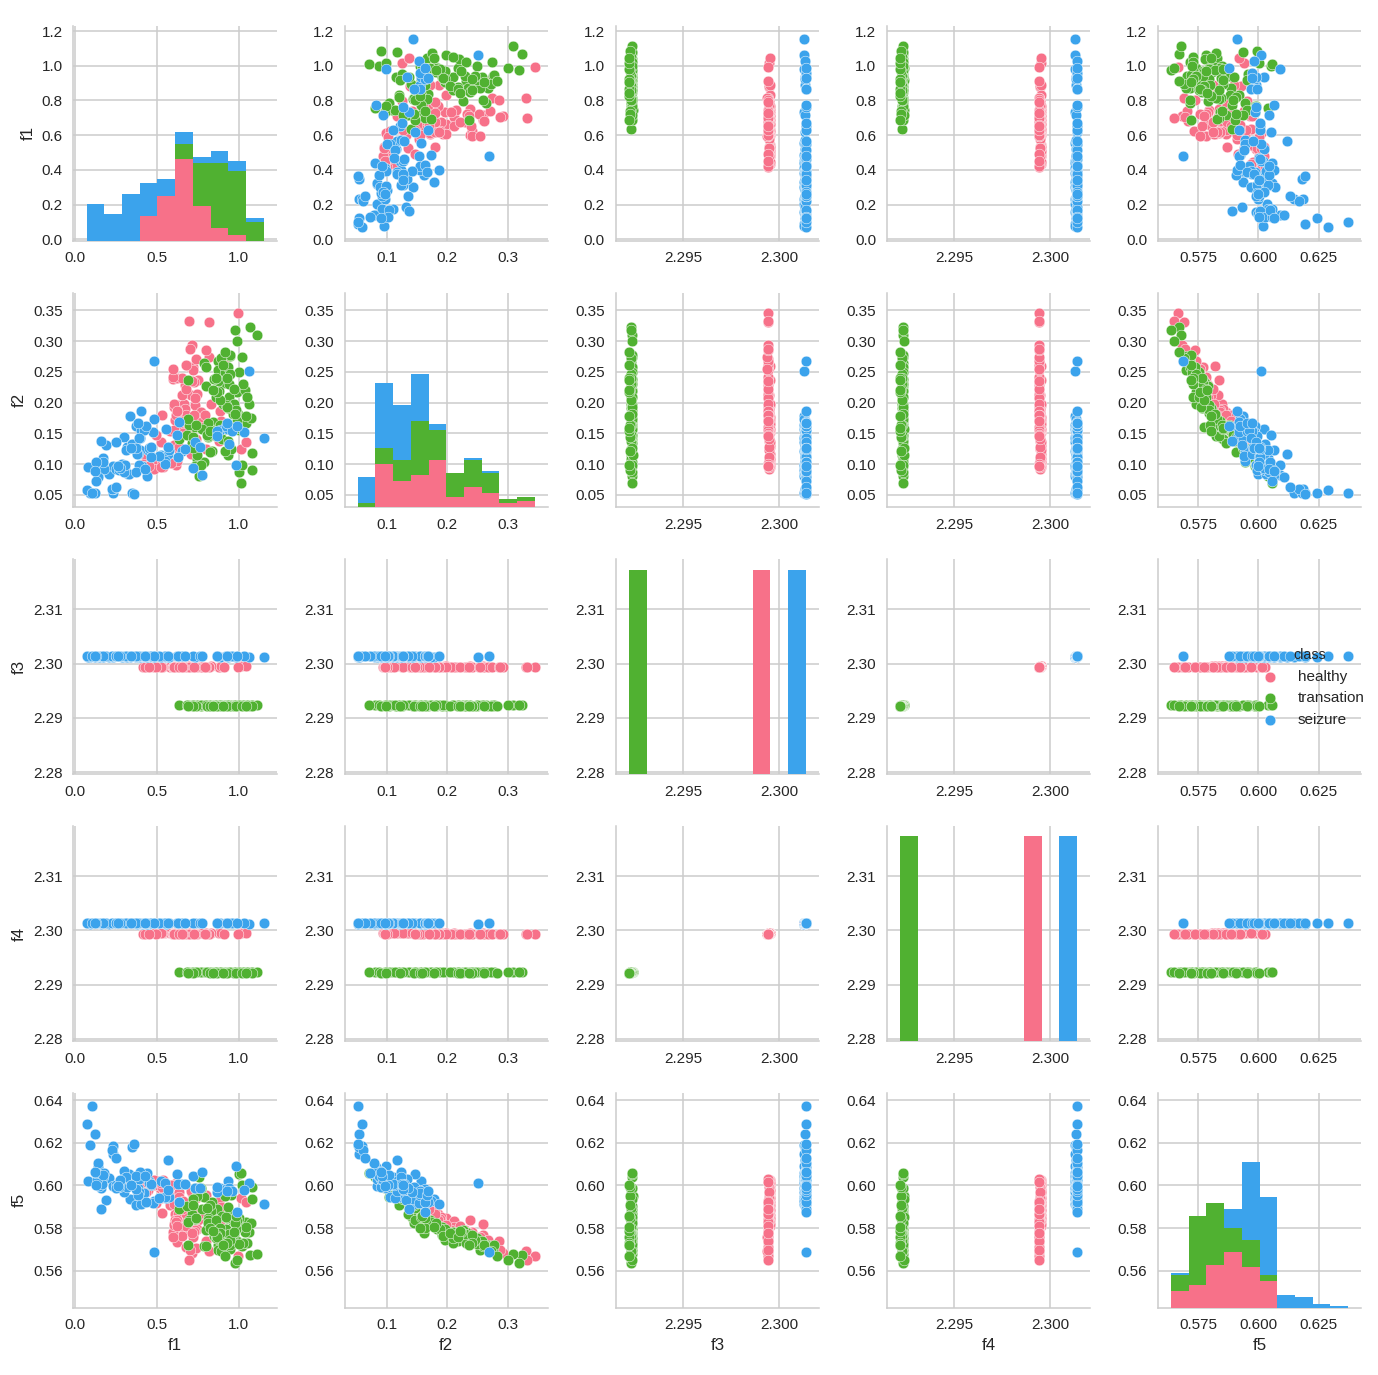

In [21]:
sbn.pairplot(visDat,hue='class',palette="husl")
plt.savefig("fig2.png")

<IPython.core.display.Javascript object>


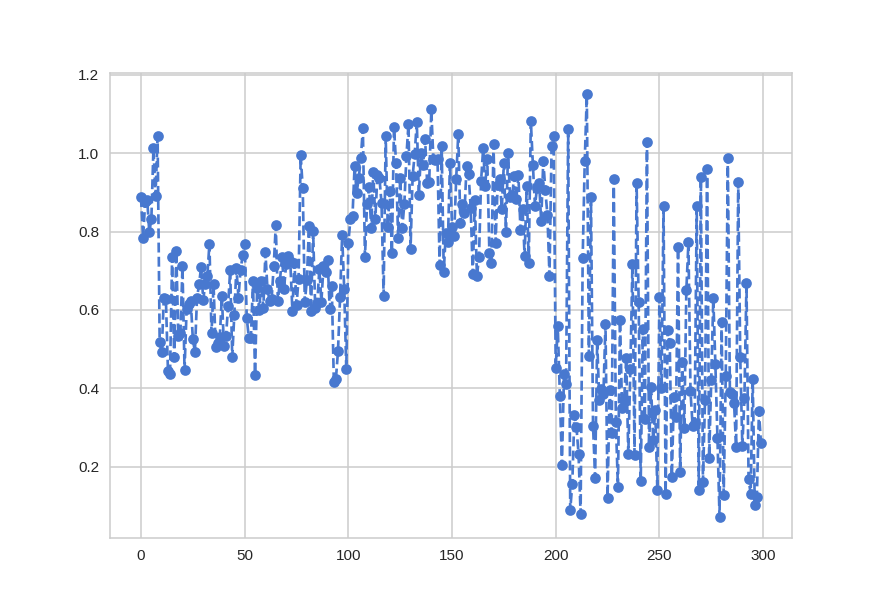

In [53]:
plt.plot(visDat['f1'],'--o')

# Split arrays or matrices into random train and test subsets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = TotalDataset[['f1','f2','f3','f4','f5']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# apply machine learning 

In [29]:
names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

In [30]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]
